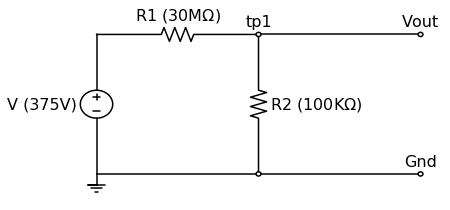

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import SchemDraw as SchemDraw
import SchemDraw.elements as SchemDrawElement
import numpy as np
import ahkab
from ahkab import circuit, printing, time_functions
import pylab as plt

from tempfile import NamedTemporaryFile

def getCircuit(mycir):
    tp = NamedTemporaryFile(mode='w+', delete=False)
    tp.write(netlist)
    tp.close()
    cir = ahkab.netlist_parser.parse_circuit(tp.name)[0]
    return cir

esquematico = SchemDraw.Drawing(unit=5)
V = esquematico.add(SchemDrawElement.SOURCE_V, label='V (375V)')
R = esquematico.add(SchemDrawElement.RES, d='right', label='R1 (30M$\Omega$)')

esquematico.push()
esquematico.add(SchemDrawElement.DOT_OPEN, d='right', label='tp1')
vout = esquematico.add(SchemDrawElement.LINE, d='right')
esquematico.add(SchemDrawElement.DOT_OPEN, d='right', label='Vout')
esquematico.pop()

esquematico.add(SchemDrawElement.LINE, to=vout.start)
esquematico.add(SchemDrawElement.RES, d='down', botlabel='R2 (100K$\Omega$)')
esquematico.push()
esquematico.add(SchemDrawElement.DOT_OPEN, d='right')
vout = esquematico.add(SchemDrawElement.LINE, d='right')
esquematico.add(SchemDrawElement.DOT_OPEN, d='right', label='Gnd')
esquematico.pop()

esquematico.add(SchemDrawElement.LINE, to=V.start)
esquematico.add(SchemDrawElement.GND)
esquematico.draw()
esquematico.save('schematic.jpg')

netlist = """
.title voltage divider
v1 vcc 0 type=vdc vdc=375 vac=1
r1 vcc tp1 30e6
r2 tp1 0 10e4
*r3 tp1 2 10e4
*r4 2 tp2 10e3
*r5 0 tp2 10e3

.dc tp1 0 2 0.05 
*vammeter vcc tp1 type=vdc vdc=0
"""
cir = getCircuit(netlist)
op_analysis = ahkab.new_op(verbose=False)
ac_analysis = ahkab.new_ac(start=1e3, stop=1e5, points=100, verbose=False)
tran_analysis = ahkab.new_tran(tstart=0, tstop=1.2e-3, tstep=1e-4, x0=None, verbose=False)
r = ahkab.run(cir, an_list=[op_analysis, ac_analysis, tran_analysis])

#print(r['op'].keys())
#print(r['ac'].keys())
#print(r['tran'].keys())

# op = r['op'].results
Vtp1_op = r['op']['VTP1'][0][0]
print(Vtp1_op)

Vtp1_ac = r['tran']['I(V1)'][0]
print(Vtp1_ac * -1e5)